In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

## データ準備

### 訓練データ&検証データの読み込み

In [10]:
train = np.load("../1_data/processed_data_train.npy")
valid = np.load("../1_data/processed_data_valid.npy")
y_train = np.load("../1_data/processed_label_train.npy")
y_valid = np.load("../1_data/processed_label_valid.npy")

In [11]:
print(f'学習用データの形状：{train.shape}')
print(f'学習用ラベルの形状：{y_train.shape}')
print(f'検証用データの形状：{valid.shape}')
print(f'検証用ラベルの形状：{y_valid.shape}')

学習用データの形状：(4200, 1, 28, 28)
学習用ラベルの形状：(4200, 15)
検証用データの形状：(900, 1, 28, 28)
検証用ラベルの形状：(900, 15)


## モデル構築・学習

In [12]:
from common.deep_convnet import DeepConvNet
from common.trainer import Trainer


In [13]:
# sampled = 200 # 高速化のため
# train = train[:sampled]
# y_train = y_train[:sampled]

In [14]:
print("訓練データをセット")
print(f'trainのshape：{train.shape}')
print(f'y_trainのshape：{y_train.shape}')

訓練データをセット
trainのshape：(4200, 1, 28, 28)
y_trainのshape：(4200, 15)


In [15]:
# ネットワーク生成（モデル構築）
network = DeepConvNet()  
print("ネットワーク生成完了")


ネットワーク生成完了


In [ ]:
# 学習
# 巨大な計算リソースを使える場合は mini_batch_size を大きくする
# len(train)を割り切れる整数とする
trainer = Trainer(network, train, y_train, valid, y_valid,
                  epochs=100, mini_batch_size=840,
                  optimizer='RMSprop', optimizer_param={'lr':0.01, 'decay_rate':0.9},
                  evaluate_sample_num_per_epoch=1000)

# trainer = Trainer(network, train, y_train, valid, y_valid,
#                   epochs=20, mini_batch_size=100,
#                   optimizer='Adam', optimizer_param={'lr':0.001},
#                   evaluate_sample_num_per_epoch=1000)

trainer.train()

Trainerクラスのインスタンスが無事生成されました
optimizer:<common.optimizer.RMSprop object at 0x7f0a0a60ee10>
総iter数：1000 = エポック数：100, ミニバッチ数：10.0
現在のiteration数：0, 訓練データの誤差：13.6
==epoch:1（全1000回）, train_acc:0.056, test_acc:0.0722==
現在のiteration数：1, 訓練データの誤差：2.72
現在のiteration数：2, 訓練データの誤差：2.71
現在のiteration数：3, 訓練データの誤差：2.77
現在のiteration数：4, 訓練データの誤差：2.71
現在のiteration数：5, 訓練データの誤差：2.71
現在のiteration数：6, 訓練データの誤差：2.71
現在のiteration数：7, 訓練データの誤差：2.71
現在のiteration数：8, 訓練データの誤差：2.7
現在のiteration数：9, 訓練データの誤差：2.71
現在のiteration数：10, 訓練データの誤差：2.72
==epoch:2（全1000回）, train_acc:0.077, test_acc:0.0589==
現在のiteration数：11, 訓練データの誤差：2.71
現在のiteration数：12, 訓練データの誤差：2.71
現在のiteration数：13, 訓練データの誤差：2.71
現在のiteration数：14, 訓練データの誤差：2.71
現在のiteration数：15, 訓練データの誤差：2.71
現在のiteration数：16, 訓練データの誤差：2.71
現在のiteration数：17, 訓練データの誤差：2.71
現在のiteration数：18, 訓練データの誤差：2.71
現在のiteration数：19, 訓練データの誤差：2.71
現在のiteration数：20, 訓練データの誤差：2.71
==epoch:3（全1000回）, train_acc:0.124, test_acc:0.0967==
現在のiteration数：21, 訓練データの誤差：2.71
現在のiteration数：22, 

In [17]:
train_acc = trainer.train_acc_list
train_loss = trainer.train_loss_list
valid_acc = trainer.test_acc_list

In [18]:
print(len(train_acc))
print(len(train_loss))
print(len(valid_acc))

100
100
100


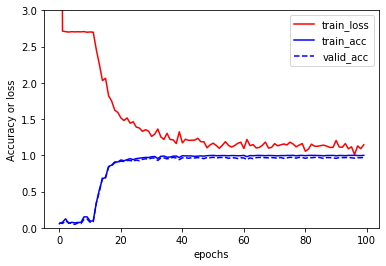

In [19]:
# lossとaccuracyのグラフ化
df_log = pd.DataFrame({"train_loss":train_loss,
             # "valid_loss":valid_loss,
             "train_acc":train_acc,
             "valid_acc":valid_acc})

df_log.plot(style=['r-', 'b-', 'b--'])
plt.ylim([0,3])
plt.ylabel("Accuracy or loss")
plt.xlabel("epochs")
plt.show()

### 学習済みモデルの出力

In [ ]:
# with open("katakana_model.pickle", "wb") as f:
#     pickle.dump(tnet, f)

In [20]:
network.save_params("katakana_model.pickle")
print("Saved Network Parameters!")

Saved Network Parameters!
